# The Sparks Foundation: Data science and Business Analytics Tasks

<img src="https://internship.thesparksfoundation.info/assests/img/logo.png"  width="300" height="300">

## Task2 : Predicition using Unsupervised ML

## Author Batool Hammoud

### importing libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### importing dataset

In [36]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Preparing the data looking for missing values, dublicated, outlier ...

In [37]:
# missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [38]:
# duplicated values
df.duplicated().sum()

1

In [39]:
# removing duplicated values
df.drop_duplicates(inplace= True, ignore_index = True)
df.duplicated().sum()

0

<AxesSubplot:>

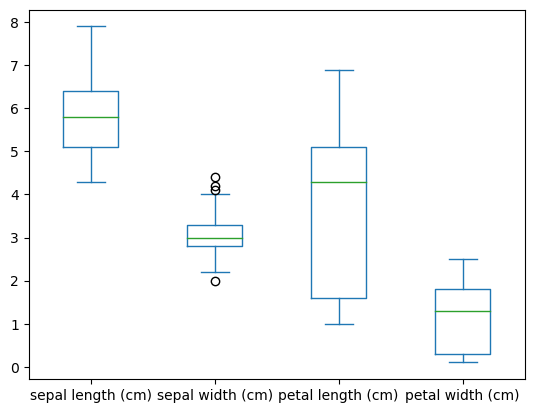

In [40]:
# finding outliers
df.plot(kind="box")

<AxesSubplot:>

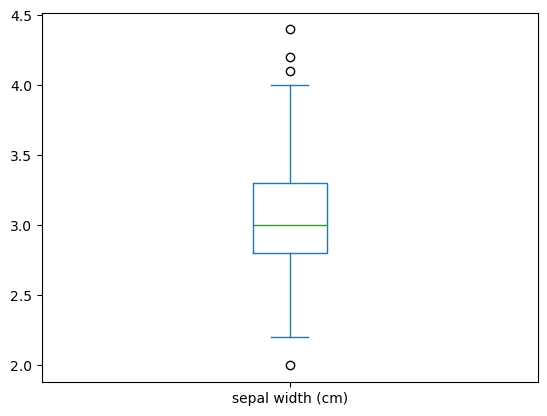

In [41]:
# finding outliers
df["sepal width (cm)"].plot(kind='box')

### Visualizing the data

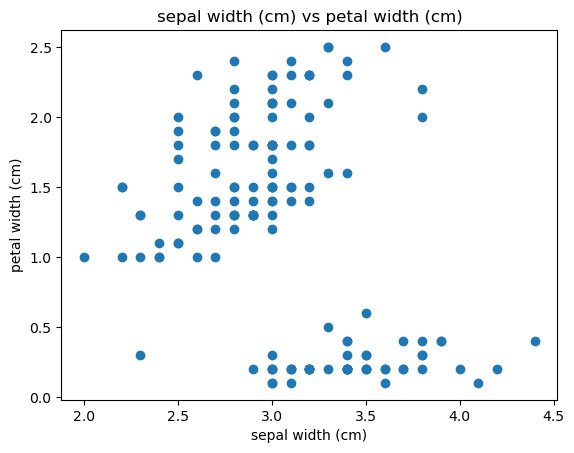

In [42]:
plt.scatter(data = df, x="sepal width (cm)", y="petal width (cm)")
plt.title('sepal width (cm) vs petal width (cm)')  
plt.xlabel('sepal width (cm)')  
plt.ylabel("petal width (cm)")  
plt.show()

* **the scatter plot above shows where is the outliers (sepal width (cm) higher than 4cm and lower than 2cm)**

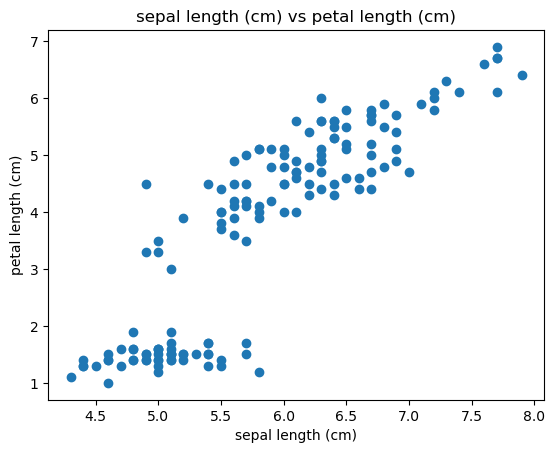

In [43]:
plt.scatter(data = df, x="sepal length (cm)", y="petal length (cm)")
plt.title('sepal length (cm) vs petal length (cm)')  
plt.xlabel('sepal length (cm)')  
plt.ylabel("petal length (cm)")  
plt.show()

### Finding the optimum number of clusters for K Means

In [44]:
# Finding optimum number of clusters of K-Means
from sklearn.cluster import KMeans
x = df.iloc[:,[0,1,2,3]].values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    


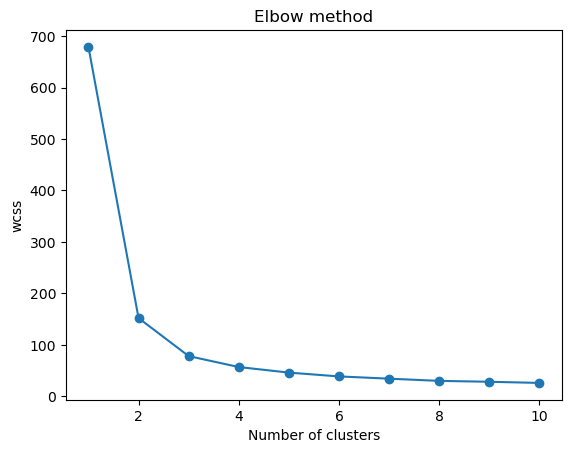

In [45]:
#plotting the results number of clusters
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

the above graph shows the optimum number of clusters which is 3 based on the elbow method

In [46]:
# retrain using 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

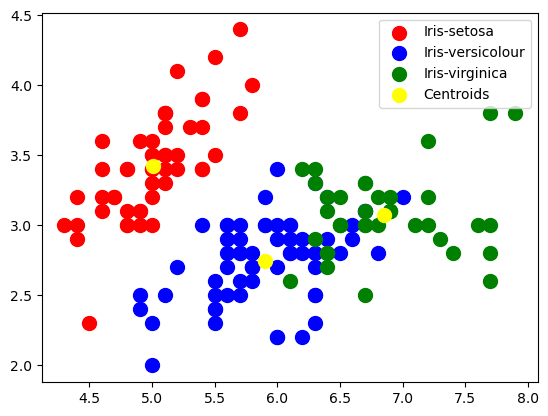

In [47]:
# visualizing using matplotlib
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

<AxesSubplot:>

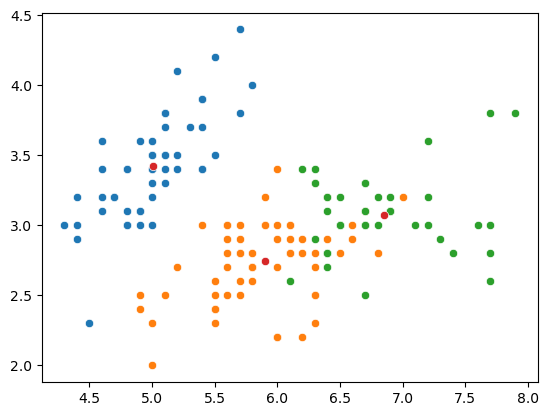

In [48]:
# visualizing using seaborn
sns.scatterplot(x = df.values[y_kmeans == 0, 0] , y = df.values[y_kmeans == 0, 1],markers = '-')
sns.scatterplot(x = df.values[y_kmeans == 1, 0] , y = df.values[y_kmeans == 1, 1])
sns.scatterplot(x = df.values[y_kmeans == 2, 0] , y = df.values[y_kmeans == 2, 1])
sns.scatterplot(x = kmeans.cluster_centers_[:, 0] , y = kmeans.cluster_centers_[:,1])
